<a href="https://colab.research.google.com/github/Ayikoandrew/Andrej-ml-class/blob/main/movie_review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Classifying movie reviews: A binary classification example***

In [1]:
import os

os.environ['KERAS_BACKEND'] = 'jax'
import keras
from keras.datasets import imdb

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


Keras backend: jax


In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [9]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [10]:
max([max(sequence) for sequence in train_data])

9999

In [13]:
key_word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in key_word_index.items()])

decoded_review = " ".join(
    [reverse_word_index.get(i -3, '?') for i in train_data[0]]
)

In [14]:
decoded_review[:100]

"? this film was just brilliant casting location scenery story direction everyone's really suited the"

In [38]:
import numpy as np

def multi_hot_encode(sequences, num_classes):
  results = np.zeros((len(sequences), num_classes))
  for i, sequence in enumerate(sequences):
    results[i][sequence] = 1.0
  return results

x_train = multi_hot_encode(train_data, 10000)
x_test = multi_hot_encode(test_data, 10000)

In [39]:
y_train = train_labels.astype('float32')
y_test = test_labels.astype("float32")

In [41]:
from keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [42]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [43]:


indice_permutation = np.random.permutation(len(x_train))

shuffle_x_train = x_train[indice_permutation]
shuffle_y_train = y_train[indice_permutation]

num_val_sample = int(0.3 * len(x_train))

val_x_train = shuffle_x_train[:num_val_sample]
val_y_train = shuffle_y_train[:num_val_sample]

training_inputs = shuffle_x_train[num_val_sample:]
testing_inputs = shuffle_y_train[num_val_sample:]

history = model.fit(
    training_inputs,
    testing_inputs,
    epochs=20,
    batch_size=512,
    validation_data=(val_x_train, val_y_train)
)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6921 - loss: 0.6230 - val_accuracy: 0.8663 - val_loss: 0.3859
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8923 - loss: 0.3263 - val_accuracy: 0.8871 - val_loss: 0.2894
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9317 - loss: 0.2109 - val_accuracy: 0.8923 - val_loss: 0.2702
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9526 - loss: 0.1583 - val_accuracy: 0.8908 - val_loss: 0.2775
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9645 - loss: 0.1235 - val_accuracy: 0.8868 - val_loss: 0.2971
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9738 - loss: 0.0982 - val_accuracy: 0.8852 - val_loss: 0.3172
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9829 - loss: 0.0748 - val_accuracy: 0.8797 - val_loss: 0.3497
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9867 - loss: 0.0637 - val_accuracy: 0.8800 - v

In [44]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

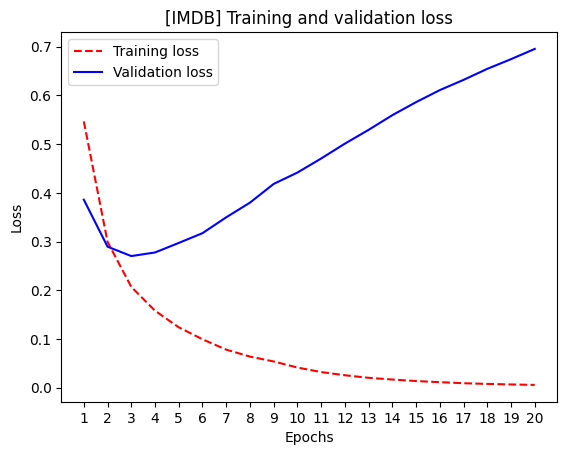

In [45]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'r--', label="Training loss")

plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title("[IMDB] Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

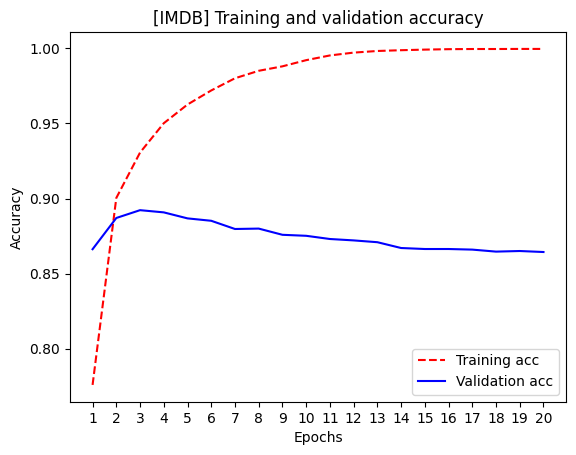

In [46]:
plt.clf()
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'r--', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [47]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=512,
)

results = model.evaluate(val_x_train, val_y_train)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6894 - loss: 0.5969
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9039 - loss: 0.2659
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9389 - loss: 0.1811
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9527 - loss: 0.1446
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9621 - loss: 0.1207


In [48]:
results

[0.1150597482919693, 0.9628000259399414]

In [49]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step


array([[0.16483045],
       [0.999979  ],
       [0.8594567 ],
       ...,
       [0.09342745],
       [0.0734788 ],
       [0.7856746 ]], dtype=float32)

# *Further experiments*